In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('smartphone_cleaned_version.csv')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.head()

,brand_names,model,price,rating,has_5g,has_nfc,has_Ir_blaster,processor_brand,no_of_core,frequency,battery_capacity,fast_charging_available,fast_charging_capacity,ram_capacity,internal_memory,screen_size,resolution,refresh_rate,num_rear_camera,num_front_camera,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,100.0,12.0,256.0,6.70,1440 x 3216,120,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6.0,128.0,6.59,1080 x 2412,120,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,1,15.0,4.0,64.0,6.60,1080 x 2408,90,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,NaN,6.0,128.0,6.55,1080 x 2400,120,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,1,67.0,6.0,128.0,6.70,1080 x 2412,120,3,1.0,android,108.0,16.0,0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_names                980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_Ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   no_of_core                 974 non-null    float64
 9   frequency                  938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging_capacity     769 non-null    float64
 13  ram_capacity               980 non-null    float64

In [ ]:
df.isnull().sum()

,0
brand_names,0
model,0
price,0
rating,101
has_5g,0
has_nfc,0
has_Ir_blaster,0
processor_brand,20
no_of_core,6
frequency,42


## UNIVARIATE ANALYSIS

In [ ]:
numerical_col = [col for col in df.columns if df[col].dtypes!='O']
category_col = [col for col in df.columns if df[col].dtypes == 'O']
print(numerical_col)

['price', 'rating', 'has_5g', 'has_nfc', 'has_Ir_blaster', 'no_of_core', 'frequency', 'battery_capacity', 'fast_charging_available', 'fast_charging_capacity', 'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_camera', 'num_front_camera', 'primary_camera_rear', 'primary_camera_front', 'extended_memory_available', 'extended_upto']


In [ ]:
print(category_col)

['brand_names', 'model', 'processor_brand', 'resolution', 'os']


<Axes: xlabel='brand_names'>

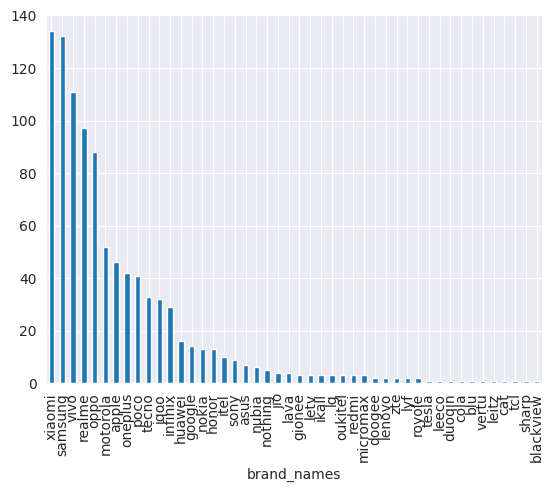

In [ ]:
# brand name
df['brand_names'].value_counts().plot(kind = 'bar')


<Axes: xlabel='brand_names'>

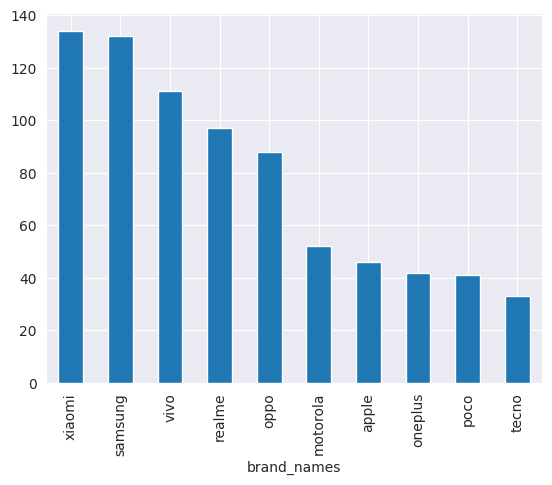

In [ ]:
# ploting a graph of top 5 phones
top_5 = df['brand_names'].value_counts().sort_values(ascending=False).head(10)
top_5.plot(kind='bar')

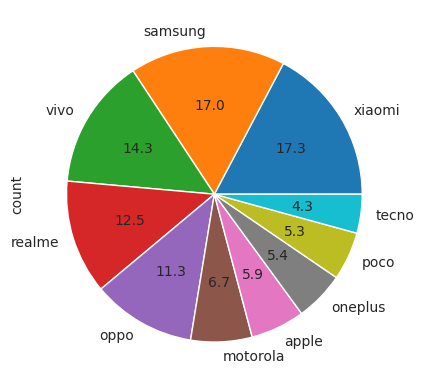

In [ ]:
top_5 = df['brand_names'].value_counts().sort_values(ascending=False).head(10).plot(kind = 'pie', autopct= '%0.1f')

In [ ]:
df['brand_names'].isnull().sum()

np.int64(0)

In [ ]:
# model
df['model'].nunique()

980

In [ ]:
# price
df['price'].describe()

,price
count,980.000000
mean,32520.504082
std,39531.812669
min,3499.000000
25%,12999.000000
50%,19994.500000
75%,35491.500000
max,650000.000000


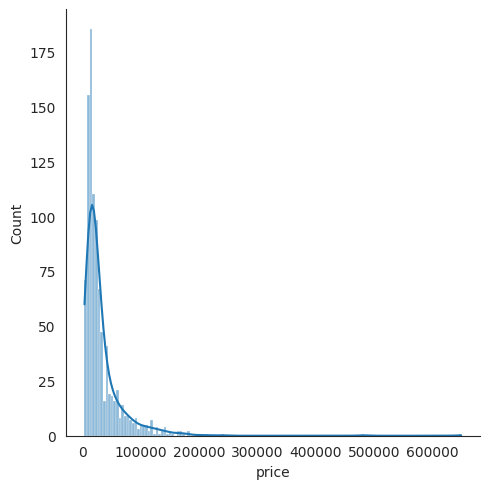

In [ ]:
sns.set_style('white')
sns.displot(x = 'price', data = df , kind = 'hist', kde = True)

<Axes: xlabel='price', ylabel='Count'>

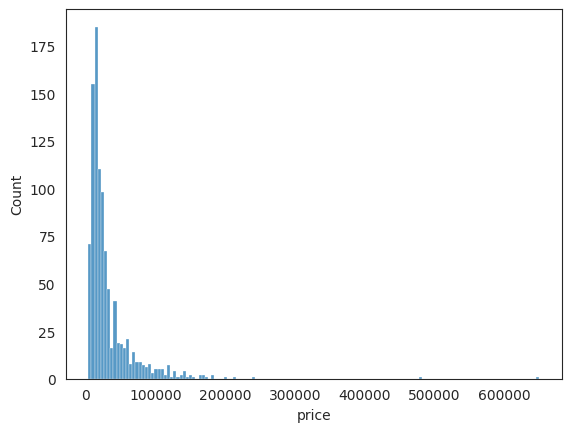

In [ ]:
sns.histplot(df['price'] , )

In [ ]:
df['price'].skew()

np.float64(6.591790999665567)

<Axes: xlabel='price'>

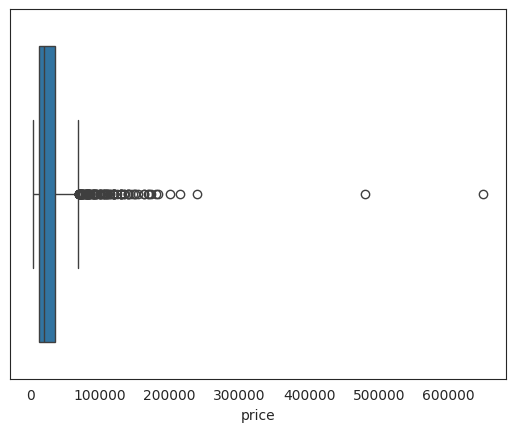

In [ ]:
sns.boxplot(x = df['price'])

In [ ]:
df[df['price'] >= 200000]

,brand_names,model,price,rating,has_5g,has_nfc,has_Ir_blaster,processor_brand,no_of_core,frequency,battery_capacity,fast_charging_available,fast_charging_capacity,ram_capacity,internal_memory,screen_size,resolution,refresh_rate,num_rear_camera,num_front_camera,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
427,vertu,Vertu Signature Touch,650000,62.0,False,True,False,snapdragon,8.0,1.50,2275.0,0,NaN,2.0,64.0,4.70,1080 x 1920,60,1,1.0,android,13.0,2.1,0,NaN
478,huawei,Huawei Mate 50 RS Porsche Design,239999,81.0,False,True,True,snapdragon,8.0,3.20,4700.0,1,66.0,12.0,512.0,6.74,1212 x 2616,120,3,1.0,other,50.0,13.0,1,256.0
887,xiaomi,Xiaomi Redmi K20 Pro Signature Edition,480000,88.0,False,True,False,snapdragon,8.0,2.80,4000.0,1,27.0,8.0,256.0,6.39,1080 x 2340,60,3,1.0,android,48.0,20.0,0,NaN
951,huawei,Huawei Mate 30 RS Porsche Design,214990,NaN,True,True,True,kirin,8.0,2.86,4500.0,1,NaN,12.0,512.0,6.53,1176 x 2400,60,4,2.0,android,40.0,32.0,1,256.0


In [ ]:
df['price'].isnull().sum()

np.int64(0)

- distribution is not normal
- max price is 650000(unexpected)
- mean is very high
- Price has some outlier from 200000 rupees
- no missing values

In [ ]:
df['rating'].describe()

,rating
count,879.000000
mean,78.258248
std,7.402854
min,60.000000
25%,74.000000
50%,80.000000
75%,84.000000
max,89.000000


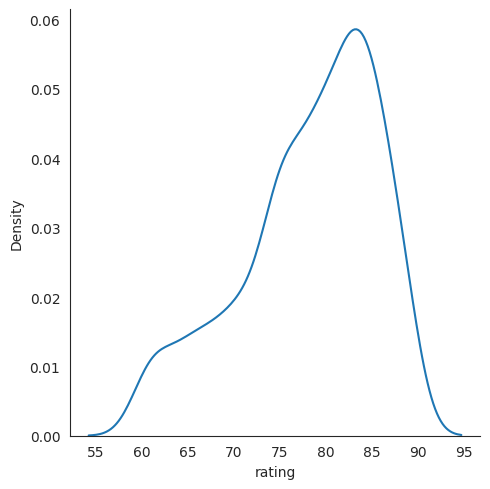

In [ ]:
sns.displot(x = df['rating'] , kind = 'kde' , data = df)

In [ ]:
df['rating'].skew()

np.float64(-0.6989993034105535)

<Axes: xlabel='rating'>

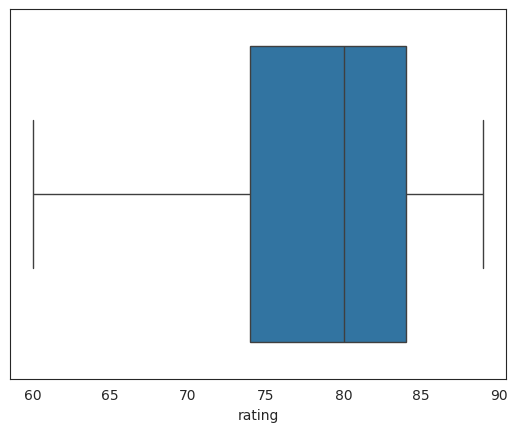

In [ ]:
sns.boxplot(x = df['rating'])

- distribution is nearly normal
- no outliers
- 101 missing values

In [ ]:
df['rating'].isnull().sum()/980

np.float64(0.10306122448979592)

<Axes: ylabel='count'>

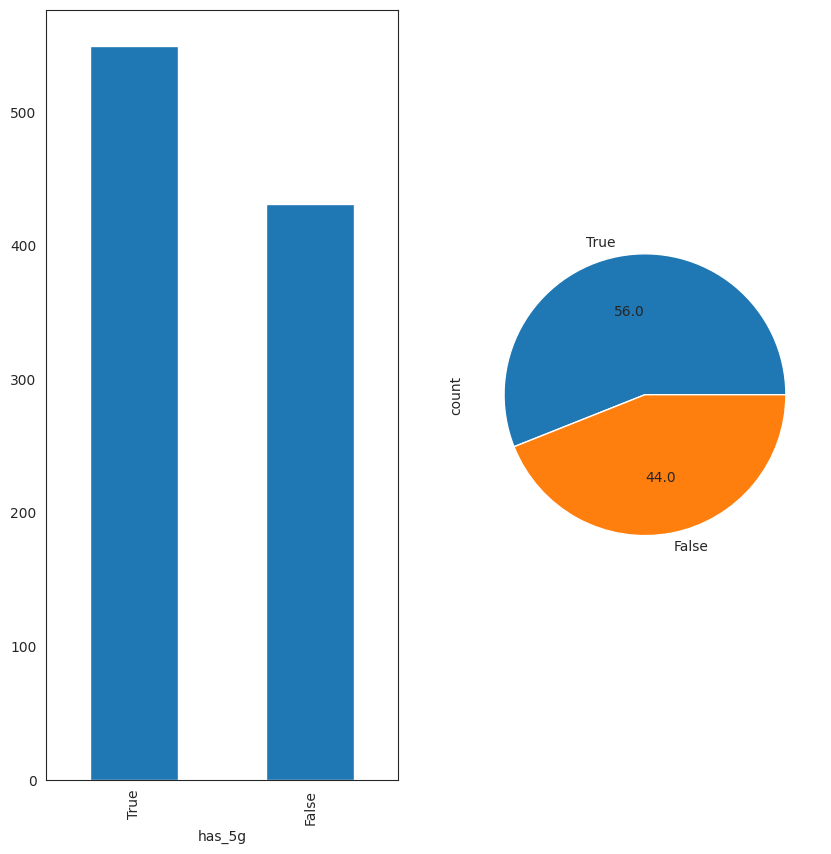

In [ ]:
# has_5g
plt.figure(figsize = (10,10))
plt.subplot(121)
df['has_5g'].value_counts().plot(kind = 'bar')
plt.subplot(122)
df['has_5g'].value_counts().plot(kind = 'pie' , autopct = '%0.1f')

<Axes: ylabel='count'>

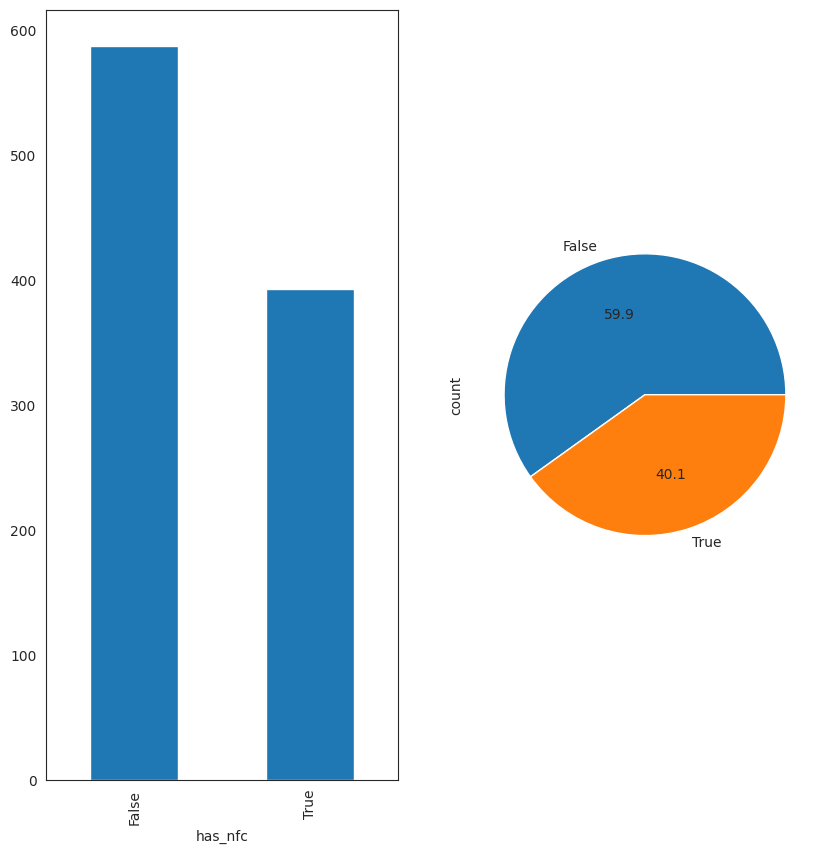

In [ ]:
# has_nfc
plt.figure(figsize = (10,10))
plt.subplot(121)
df['has_nfc'].value_counts().plot(kind = 'bar')
plt.subplot(122)
df['has_nfc'].value_counts().plot(kind = 'pie' , autopct = '%0.1f')

<Axes: ylabel='count'>

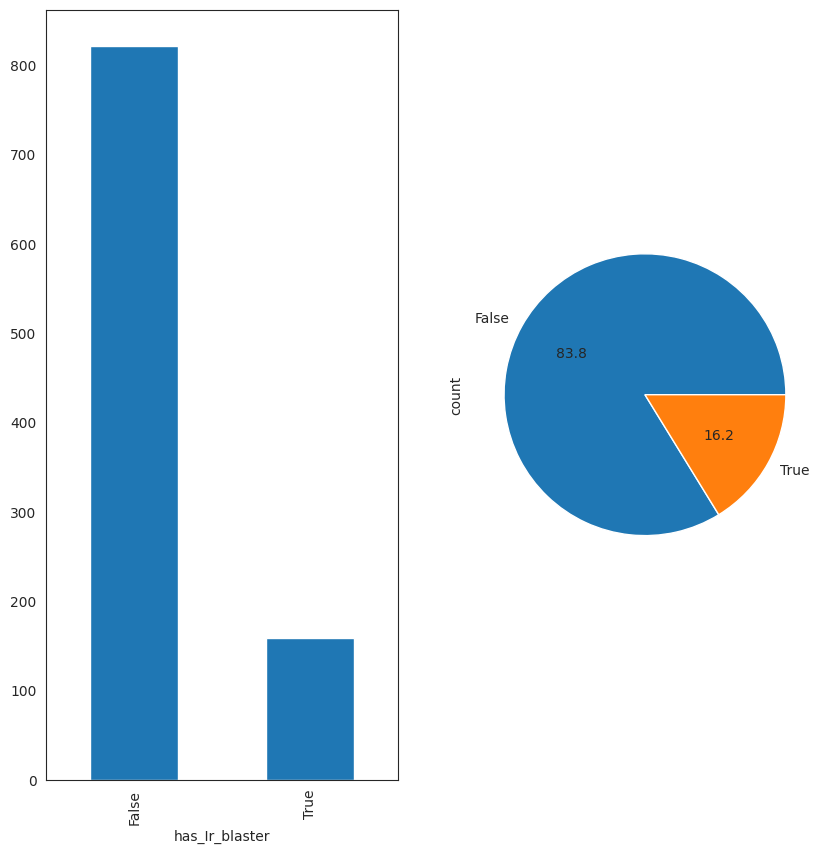

In [ ]:
# has_Ir_Blaster
plt.figure(figsize = (10,10))
plt.subplot(121)
df['has_Ir_blaster'].value_counts().plot(kind = 'bar')
plt.subplot(122)
df['has_Ir_blaster'].value_counts().plot(kind = 'pie' , autopct = '%0.1f')

In [ ]:
df[df['has_Ir_blaster'] == True]['brand_names'].value_counts()

,count
brand_names,
xiaomi,109
poco,30
iqoo,6
huawei,6
vivo,4
redmi,2
honor,1
samsung,1


- mostly xiaomi and poco has Ir blasters in smartphone

In [ ]:
df['processor_brand'] = df['processor_brand'].replace({
    'sanpdragon':'snapdragon'
})

<Axes: ylabel='count'>

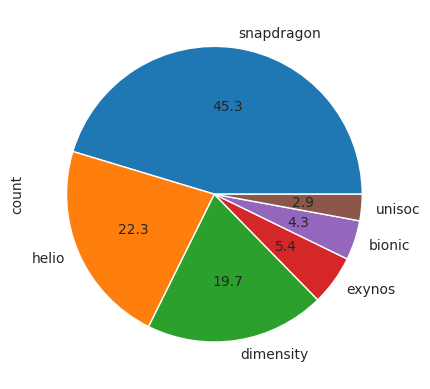

In [ ]:
# processor_brand
df['processor_brand'].value_counts().head(6).plot(kind = 'pie' , autopct = '%0.1f')

<Axes: ylabel='count'>

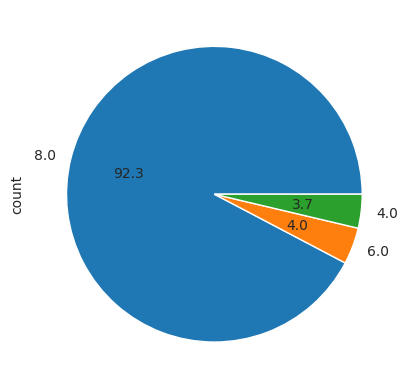

In [ ]:
# num_cores
df['no_of_core'].value_counts().head(6).plot(kind = 'pie' , autopct = '%0.1f')

- not suitable column for machine learning b'coz 92% phones have octa core

<Axes: ylabel='count'>

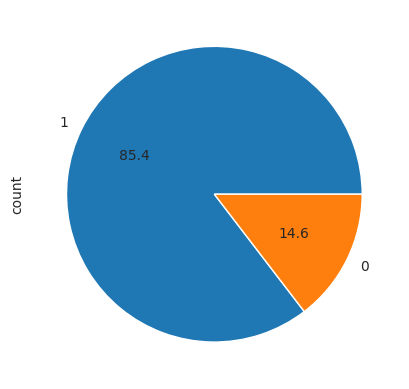

In [ ]:
# fast_charging_available
df['fast_charging_available'].value_counts().head(6).plot(kind = 'pie' , autopct = '%0.1f')

<Axes: xlabel='fast_charging_available'>

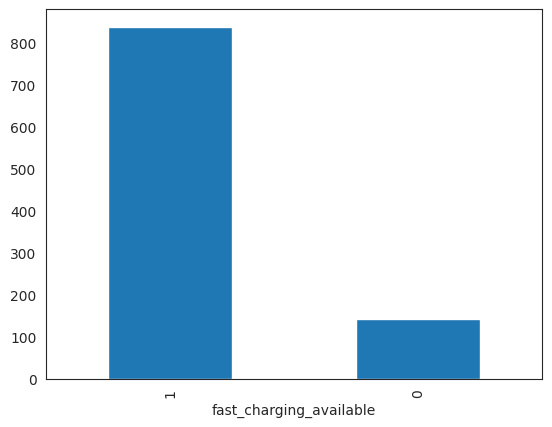

In [ ]:
df['fast_charging_available'].value_counts().plot(kind = 'bar')

In [ ]:
df[df['fast_charging_available'] == 0]['brand_names'].value_counts()

,count
brand_names,
vivo,18
realme,17
apple,14
oppo,13
tecno,11
xiaomi,11
samsung,10
itel,8
infinix,5


In [ ]:
df[df['fast_charging_available'] == 1]['brand_names'].value_counts()

,count
brand_names,
xiaomi,123
samsung,122
vivo,93
realme,80
oppo,75
motorola,50
oneplus,41
poco,38
apple,32


In [ ]:
# df[(df['fast_charging_available'] == 0) & (df['brand_names'].str.lower() == 'vivo')]
# df[(df['fast_charging_available'] == 0) & (df['brand_names'].str.lower() == 'realme')]
# df[(df['fast_charging_available'] == 0) & (df['brand_names'].str.lower() == 'apple')]
# df[(df['fast_charging_available'] == 0) & (df['brand_names'].str.lower() == 'oppo')]
# df[(df['fast_charging_available'] == 0) & (df['brand_names'].str.lower() == 'tecno')]
# df[(df['fast_charging_available'] == 0) & (df['brand_names'].str.lower() == 'xiaomi')]
df[(df['fast_charging_available'] == 0) & (df['brand_names'].str.lower() == 'samsung')]

,brand_names,model,price,rating,has_5g,has_nfc,has_Ir_blaster,processor_brand,no_of_core,frequency,battery_capacity,fast_charging_available,fast_charging_capacity,ram_capacity,internal_memory,screen_size,resolution,refresh_rate,num_rear_camera,num_front_camera,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
218,samsung,Samsung Galaxy A04e,9299,65.0,False,False,False,helio,8.0,2.3,5000.0,0,NaN,3.0,32.0,6.5,720 x 1600,60,2,1.0,android,13.0,5.0,1,1024.0
335,samsung,Samsung Galaxy A03 Core,6499,NaN,False,False,False,unisoc,4.0,1.6,5000.0,0,NaN,2.0,32.0,6.5,720 x 1600,60,1,1.0,android,8.0,5.0,1,1024.0
457,samsung,Samsung Galaxy F22,11499,73.0,False,False,False,helio,8.0,2.0,6000.0,0,NaN,4.0,64.0,6.4,720 x 1600,90,4,1.0,android,48.0,13.0,1,1024.0
565,samsung,Samsung Galaxy A04e (3GB RAM + 64GB),9950,66.0,False,False,False,helio,8.0,2.3,5000.0,0,NaN,3.0,64.0,6.5,720 x 1600,60,2,1.0,android,13.0,5.0,1,1024.0
597,samsung,Samsung Galaxy A04e (4GB RAM + 128GB),11499,69.0,False,False,False,helio,8.0,2.3,5000.0,0,NaN,4.0,128.0,6.5,720 x 1600,60,2,1.0,android,13.0,5.0,1,1024.0
759,samsung,Samsung Galaxy F22 (6GB RAM + 128GB),13499,76.0,False,False,False,helio,8.0,2.0,6000.0,0,NaN,6.0,128.0,6.4,720 x 1600,90,4,1.0,android,48.0,13.0,1,1024.0
804,samsung,Samsung Galaxy M14,14999,60.0,False,False,False,exynos,8.0,NaN,6000.0,0,NaN,4.0,64.0,6.5,720 x 1600,60,3,1.0,android,48.0,8.0,1,512.0
827,samsung,Samsung Galaxy A01 Core,4999,NaN,False,False,False,mediatek,4.0,1.5,3000.0,0,NaN,1.0,16.0,5.3,720 x 1480,60,1,1.0,android,8.0,5.0,1,NaN
940,samsung,Samsung Galaxy A21s (6GB RAM + 128GB),17499,75.0,False,False,False,exynos,8.0,2.0,5000.0,0,NaN,6.0,128.0,6.5,720 x 1600,60,4,1.0,android,48.0,13.0,1,512.0
956,samsung,Samsung Galaxy A7 (2018),21490,70.0,False,False,False,exynos,8.0,2.2,3300.0,0,NaN,4.0,64.0,6.0,2220 x 1080,60,3,1.0,android,24.0,24.0,1,512.0


- vivo Y21 or older series mostly not support fast charging method
- realme C11,C33,C21 series not supported fast charging method while C35 support fast charging method
- apple iphone 12 version and apple iphone SE not support fast charging method
- oppo A12 version or some series not provide fast charging method
- tecno spark series not provide fast charging method
- xioami redmi 9A and redmi 10A series not provide fast charging method
- samsung A01 , A03e,A04e version not provide fast charging support

In [ ]:
df[
    (df['fast_charging_available'] == 1) &
    (df['brand_names'].str.lower() == 'samsung') &
    (df['model'].str.contains('Samsung Galaxy A04e', case=False, na=False))
]


,brand_names,model,price,rating,has_5g,has_nfc,has_Ir_blaster,processor_brand,no_of_core,frequency,battery_capacity,fast_charging_available,fast_charging_capacity,ram_capacity,internal_memory,screen_size,resolution,refresh_rate,num_rear_camera,num_front_camera,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto


In [ ]:
df.head()

,brand_names,model,price,rating,has_5g,has_nfc,has_Ir_blaster,processor_brand,no_of_core,frequency,battery_capacity,fast_charging_available,fast_charging_capacity,ram_capacity,internal_memory,screen_size,resolution,refresh_rate,num_rear_camera,num_front_camera,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,100.0,12.0,256.0,6.70,1440 x 3216,120,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6.0,128.0,6.59,1080 x 2412,120,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,1,15.0,4.0,64.0,6.60,1080 x 2408,90,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,NaN,6.0,128.0,6.55,1080 x 2400,120,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,1,67.0,6.0,128.0,6.70,1080 x 2412,120,3,1.0,android,108.0,16.0,0,NaN


<Axes: xlabel='ram_capacity'>

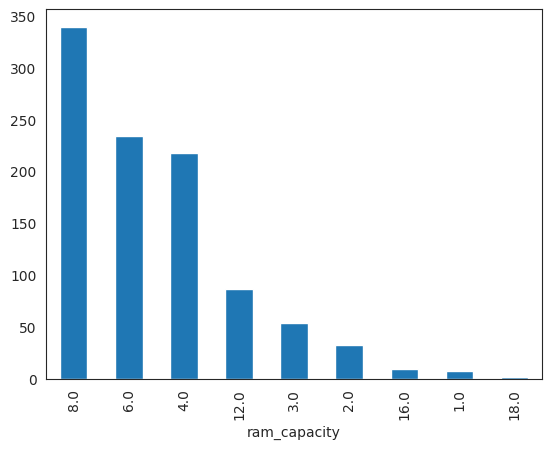

In [ ]:
# ram_capacity
df['ram_capacity'].value_counts().plot(kind = 'bar')

<Axes: ylabel='count'>

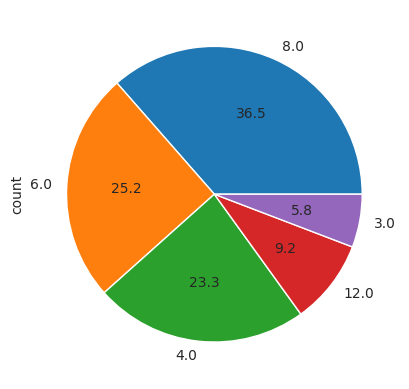

In [ ]:
df['ram_capacity'].value_counts().head(5).plot(kind = 'pie', autopct = '%0.1f')

- mostly smartphones has 8gb support

<Axes: ylabel='count'>

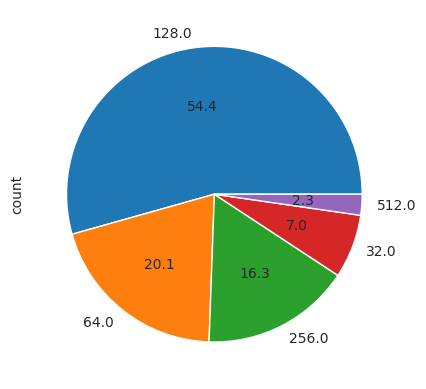

In [ ]:
df['internal_memory'].value_counts().head(5).plot(kind = 'pie', autopct = '%0.1f')

- mostly smarthphones has 128 GB internal memory

In [ ]:
df.columns

Index(['brand_names', 'model', 'price', 'rating', 'has_5g', 'has_nfc',
       'has_Ir_blaster', 'processor_brand', 'no_of_core', 'frequency',
       'battery_capacity', 'fast_charging_available', 'fast_charging_capacity',
       'ram_capacity', 'internal_memory', 'screen_size', 'resolution',
       'refresh_rate', 'num_rear_camera', 'num_front_camera', 'os',
       'primary_camera_rear', 'primary_camera_front',
       'extended_memory_available', 'extended_upto'],
      dtype='object')

<Axes: ylabel='count'>

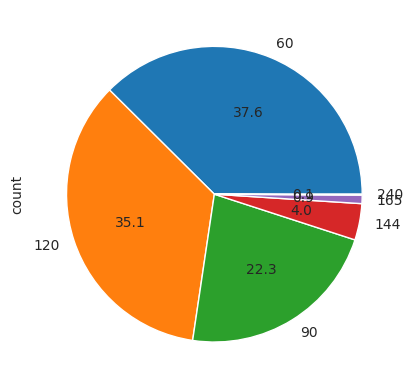

In [ ]:
df['refresh_rate'].value_counts().head(9).plot(kind = 'pie', autopct = '%0.1f')

In [ ]:
df[df['refresh_rate']>144]

,brand_names,model,price,rating,has_5g,has_nfc,has_Ir_blaster,processor_brand,no_of_core,frequency,battery_capacity,fast_charging_available,fast_charging_capacity,ram_capacity,internal_memory,screen_size,resolution,refresh_rate,num_rear_camera,num_front_camera,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
118,tesla,Tesla Pi Phone,69999,83.0,True,True,False,NaN,8.0,NaN,5000.0,1,120.0,16.0,512.0,6.73,1080 x 2448,165,3,1.0,android,50.0,32.0,0,NaN
182,motorola,Motorola Moto X40,39999,89.0,True,True,False,snapdragon,8.0,3.2,4600.0,1,125.0,8.0,128.0,6.70,1080 x 2400,165,3,1.0,android,50.0,60.0,0,NaN
278,asus,Asus ROG Phone 6 Pro 5G,89999,88.0,True,True,False,snapdragon,8.0,3.2,6000.0,1,65.0,18.0,512.0,6.78,1080 x 2448,165,3,1.0,android,50.0,12.0,0,NaN
406,asus,Asus ROG Phone 7,75990,87.0,True,True,False,snapdragon,8.0,3.2,6000.0,1,120.0,18.0,256.0,6.80,1080 x 2448,165,3,1.0,android,64.0,32.0,0,NaN
441,asus,Asus ROG Phone 6 Batman Edition,72999,88.0,True,True,False,dimensity,8.0,3.2,6000.0,1,65.0,16.0,256.0,6.78,1080 x 2448,165,3,1.0,android,50.0,12.0,0,NaN
571,motorola,Motorola Edge 40 Pro 5G,59990,89.0,True,True,False,snapdragon,8.0,3.2,4800.0,1,125.0,8.0,128.0,6.70,1080 x 2460,165,3,1.0,android,50.0,60.0,0,NaN
633,asus,Asus ROG Phone 6,71999,86.0,True,True,False,snapdragon,8.0,3.2,6000.0,1,65.0,12.0,256.0,6.78,1080 x 2448,165,3,1.0,android,50.0,12.0,0,NaN
699,asus,Asus ROG Phone 6D Ultimate,107990,NaN,True,True,False,dimensity,8.0,3.2,6000.0,1,65.0,16.0,512.0,6.78,1080 x 2448,165,3,1.0,NaN,50.0,12.0,0,NaN
784,leitz,Leitz Phone 2,124990,89.0,True,True,False,snapdragon,8.0,3.0,5000.0,1,NaN,12.0,256.0,6.60,1260 x 2730,240,2,1.0,android,47.2,12.6,1,1024.0
924,nubia,Nubia Red Magic 6S 5G,44999,84.0,True,True,False,snapdragon,8.0,2.9,5050.0,1,30.0,8.0,128.0,6.80,1080 x 2400,165,3,1.0,android,64.0,8.0,0,NaN


- refresh rate 240 is found in very rare case so it is a outlier

<Axes: ylabel='count'>

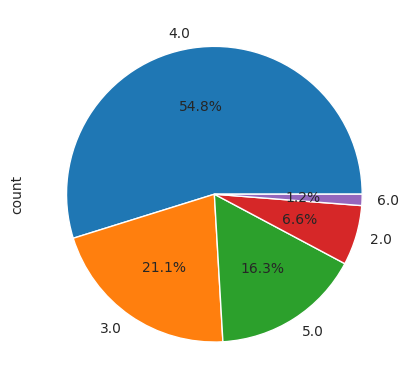

In [ ]:
(df['num_rear_camera'] + df['num_front_camera']).value_counts().plot(kind='pie',autopct="%0.1f%%")

In [ ]:
df[df['num_rear_camera'] + df['num_front_camera']==6]

,brand_names,model,price,rating,has_5g,has_nfc,has_Ir_blaster,processor_brand,no_of_core,frequency,battery_capacity,fast_charging_available,fast_charging_capacity,ram_capacity,internal_memory,screen_size,resolution,refresh_rate,num_rear_camera,num_front_camera,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
369,vivo,Vivo V21 Pro,32999,85.0,True,False,False,snapdragon,8.0,2.40,4300.0,1,33.0,8.0,128.0,6.44,1080 x 2400,60,4,2.0,android,64.0,44.0,0,NaN
413,realme,Realme X50 Pro 5G (12GB RAM + 256GB),27999,87.0,True,True,False,snapdragon,8.0,2.84,4200.0,1,65.0,12.0,256.0,6.44,1080 x 2400,90,4,2.0,android,64.0,32.0,0,NaN
477,vivo,Vivo X Fold Plus,113990,NaN,True,True,False,snapdragon,8.0,3.20,4730.0,1,80.0,12.0,256.0,8.03,1916 x 2160,120,4,2.0,android,50.0,16.0,0,NaN
649,honor,Honor Magic 4 Pro Plus 5G,94990,NaN,True,True,False,snapdragon,8.0,3.00,4600.0,1,120.0,12.0,512.0,6.76,1344 x 2772,120,4,2.0,android,50.0,13.0,0,NaN
691,oppo,OPPO F17 Pro,18990,83.0,False,False,False,helio,8.0,2.20,4015.0,1,30.0,8.0,128.0,6.43,1080 x 2400,60,4,2.0,android,48.0,16.0,1,256.0
719,motorola,Motorola Edge S,22490,87.0,True,True,False,snapdragon,8.0,3.20,5000.0,1,20.0,6.0,128.0,6.70,1080 x 2520,90,4,2.0,android,64.0,16.0,1,NaN
725,vivo,Vivo V19 (8GB RAM + 256GB),27990,84.0,False,False,False,snapdragon,8.0,2.30,4500.0,1,33.0,8.0,256.0,6.44,1080 x 2400,60,4,2.0,android,48.0,32.0,1,512.0
774,realme,Realme 6 Pro,14490,80.0,False,False,False,snapdragon,8.0,2.30,4300.0,1,30.0,6.0,64.0,6.60,1080 x 2400,90,4,2.0,android,64.0,16.0,1,256.0
775,huawei,Huawei P40 Pro,82990,NaN,True,True,False,kirin,8.0,2.86,4200.0,1,40.0,8.0,256.0,6.58,1200 x 2640,90,4,2.0,android,50.0,32.0,1,256.0
863,tecno,Tecno Phantom X Pro,22999,84.0,False,False,False,helio,8.0,2.05,5000.0,1,44.0,8.0,256.0,6.70,1080 x 2400,120,4,2.0,android,50.0,48.0,0,NaN


- in these phone extra front and rear camera use for depth information

<Axes: ylabel='count'>

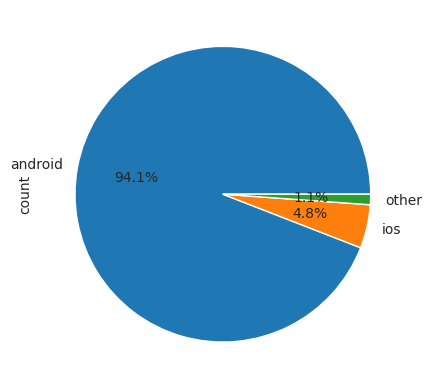

In [ ]:
# os
df['os'].value_counts().plot(kind='pie',autopct='%0.1f%%')

- android is dominated and but it is suitable for machine learning because 4.8% ios is used to diffrentiate price column

<Axes: ylabel='count'>

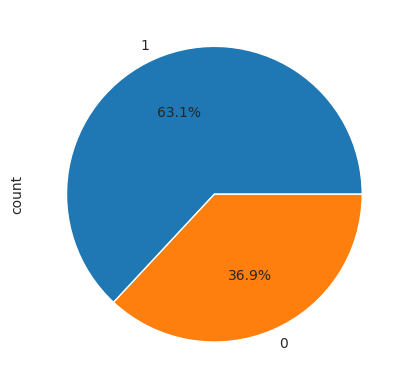

In [ ]:
# extended_memory_available
df['extended_memory_available'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='count'>

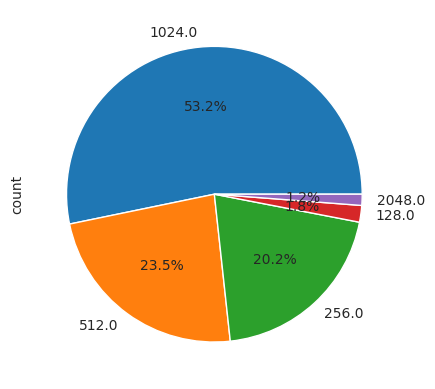

In [ ]:
df['extended_upto'].value_counts().head(5).plot(kind='pie',autopct='%0.1f%%')

In [ ]:
df[df['extended_upto'] == 2048]

,brand_names,model,price,rating,has_5g,has_nfc,has_Ir_blaster,processor_brand,no_of_core,frequency,battery_capacity,fast_charging_available,fast_charging_capacity,ram_capacity,internal_memory,screen_size,resolution,refresh_rate,num_rear_camera,num_front_camera,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
123,infinix,Infinix Note 12 Pro 5G,18999,84.0,True,False,False,dimensity,8.0,2.40,5000.0,1,33.0,8.0,128.0,6.70,1080 x 2400,60,3,1.0,android,108.0,16.0,1,2048.0
251,infinix,Infinix Zero 20,17999,87.0,False,True,False,helio,8.0,2.20,4500.0,1,45.0,8.0,128.0,6.70,1080 x 2400,90,3,1.0,android,108.0,60.0,1,2048.0
264,infinix,Infinix Note 12 5G,15999,78.0,True,False,False,dimensity,8.0,2.40,5000.0,1,33.0,6.0,64.0,6.70,1080 x 2400,60,3,1.0,android,50.0,16.0,1,2048.0
286,infinix,Infinix Note 12 Pro,16900,83.0,False,False,False,helio,8.0,2.20,5000.0,1,33.0,8.0,256.0,6.70,1080 x 2400,60,3,1.0,android,108.0,16.0,1,2048.0
707,infinix,Infinix Note 11S (8GB RAM + 128GB),15999,79.0,False,False,False,helio,8.0,2.05,5000.0,1,33.0,8.0,128.0,6.95,1080 x 2460,120,3,1.0,android,50.0,16.0,1,2048.0
843,doogee,Doogee V Max,45999,88.0,True,False,False,dimensity,8.0,2.60,22000.0,1,33.0,12.0,256.0,6.58,1080 x 2408,120,3,1.0,android,108.0,32.0,1,2048.0


- Infinix Note series provide 2048 extended memory support and the price are for these phones > 15000

In [ ]:
def plot_graph(column_name):
  plt.figure(figsize = (10,10))
  sns.displot(x = column_name, kind = 'hist' , kde = True , data = df, label = column_name)
  sns.catplot(kind= 'box' , data = df,  x = df[column_name])
  plt.show()

In [ ]:
numeric_columns = df.select_dtypes(include = ['float64' , 'int64']).iloc[:,[0,1,2,3,4,6,9,13,14,16]].columns

<Figure size 1000x1000 with 0 Axes>

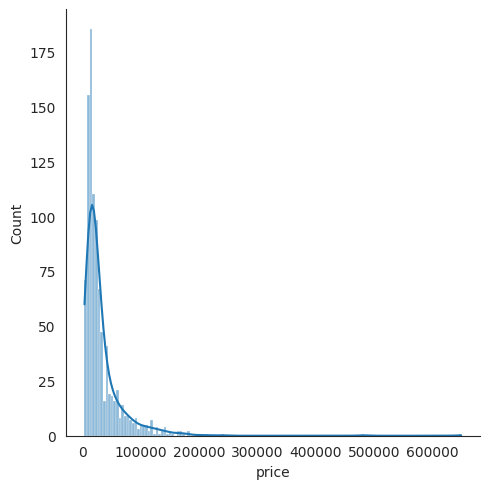

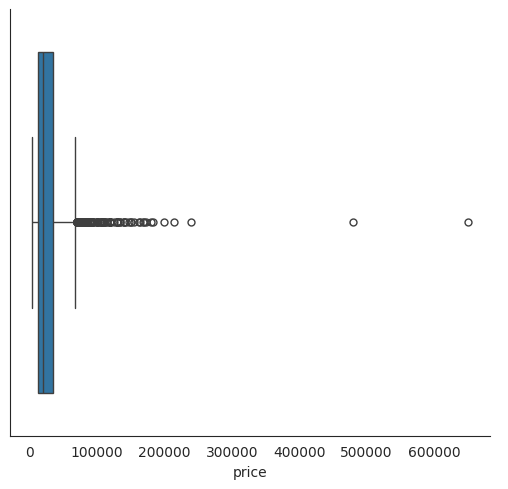

<Figure size 1000x1000 with 0 Axes>

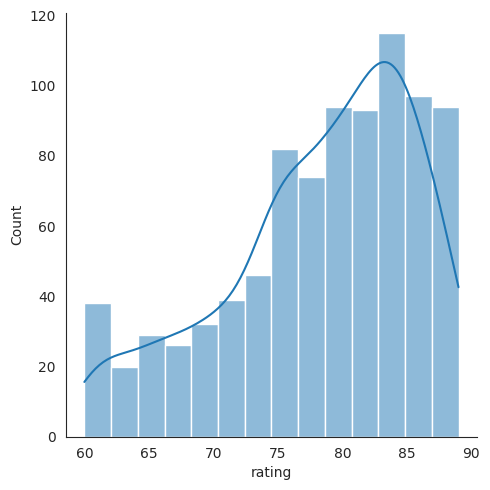

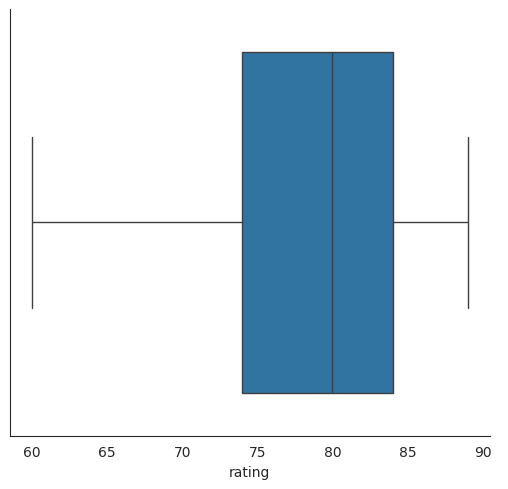

<Figure size 1000x1000 with 0 Axes>

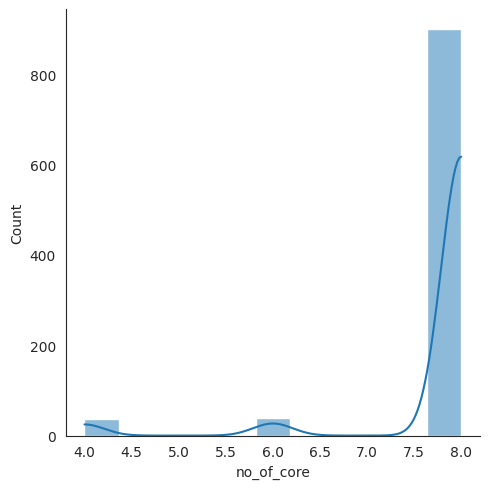

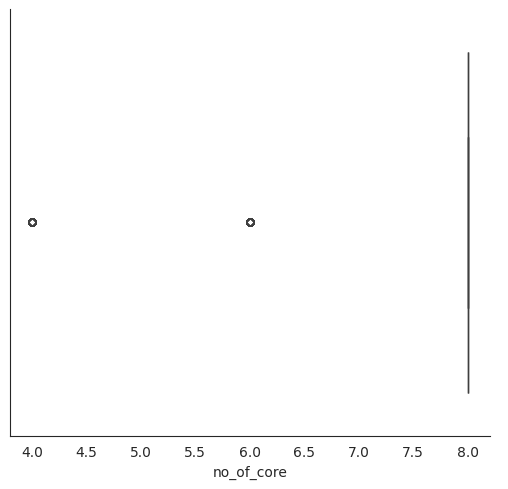

<Figure size 1000x1000 with 0 Axes>

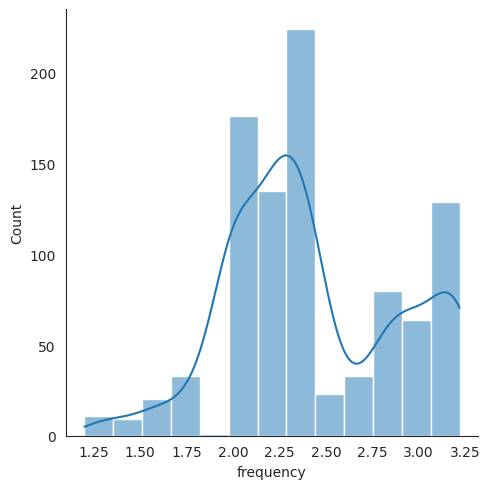

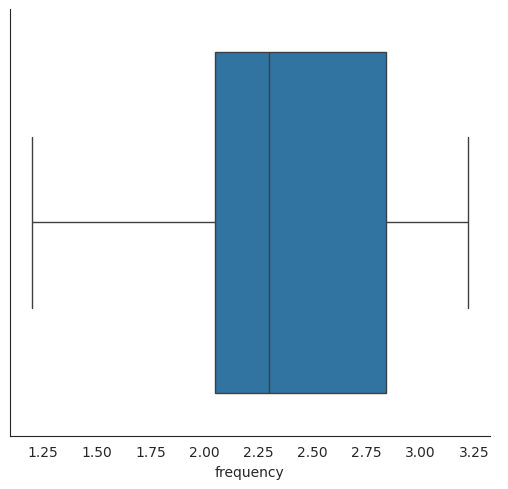

<Figure size 1000x1000 with 0 Axes>

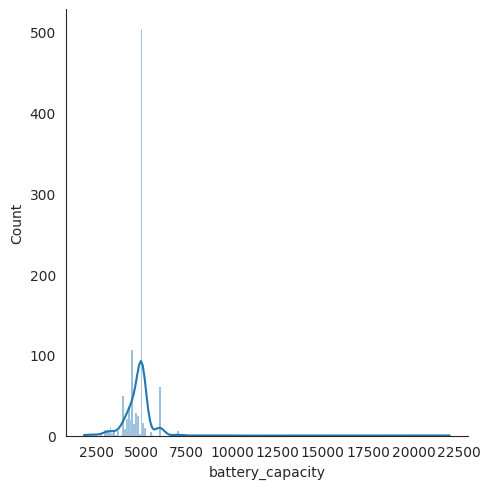

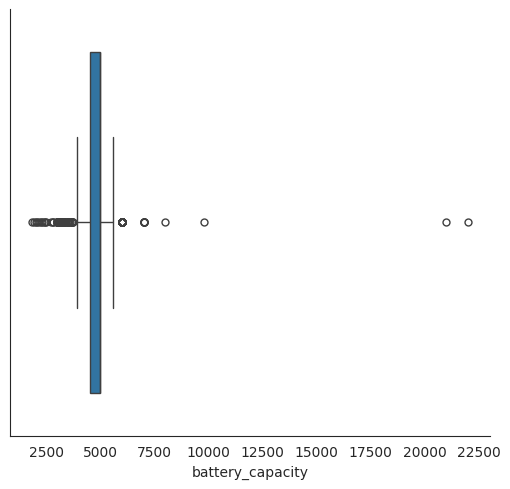

<Figure size 1000x1000 with 0 Axes>

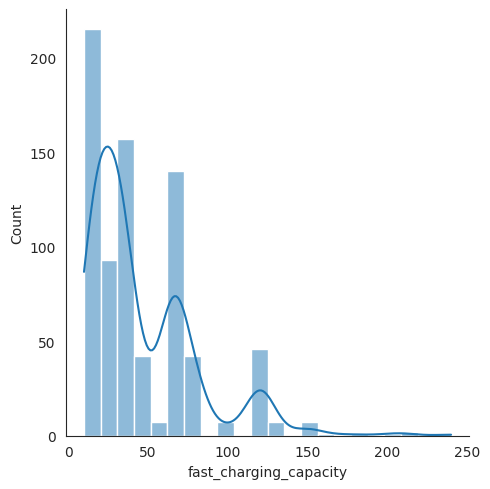

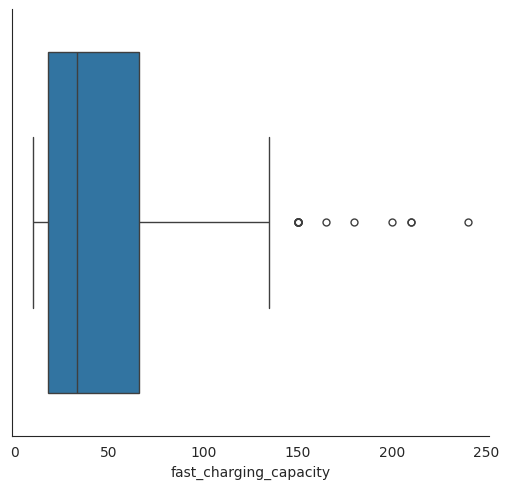

<Figure size 1000x1000 with 0 Axes>

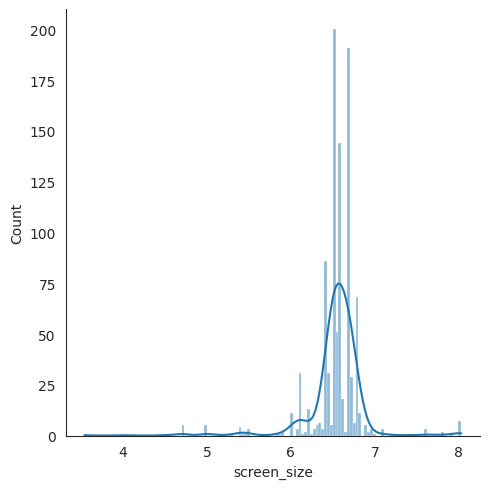

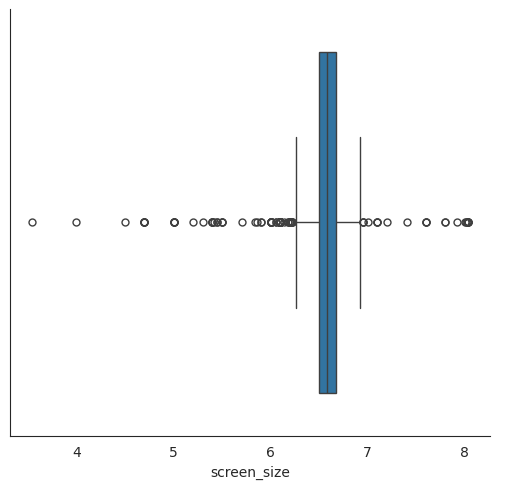

<Figure size 1000x1000 with 0 Axes>

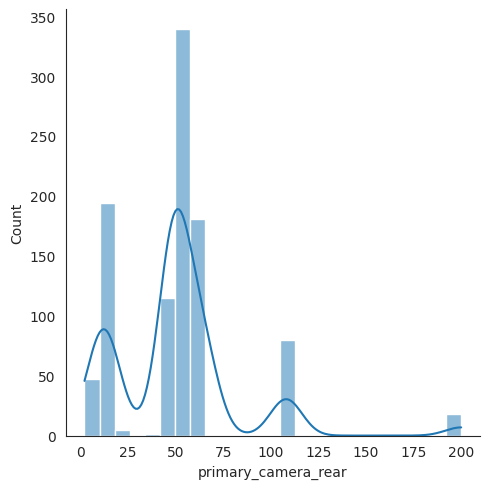

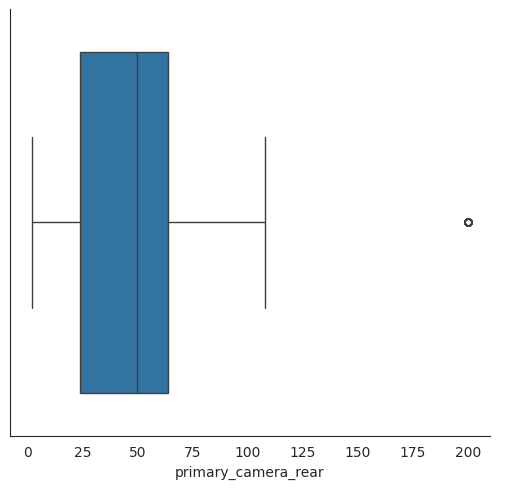

<Figure size 1000x1000 with 0 Axes>

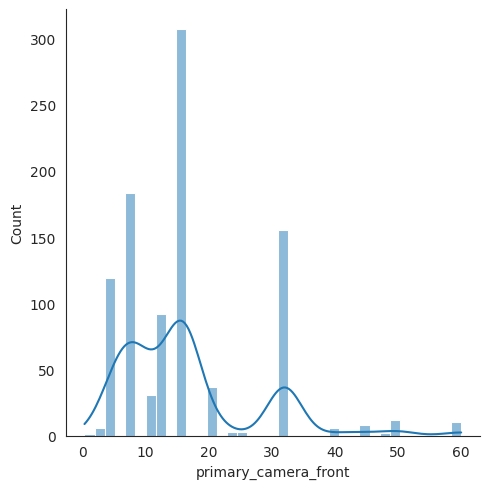

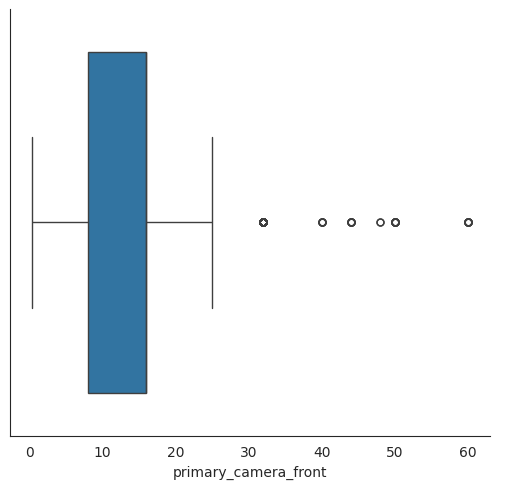

<Figure size 1000x1000 with 0 Axes>

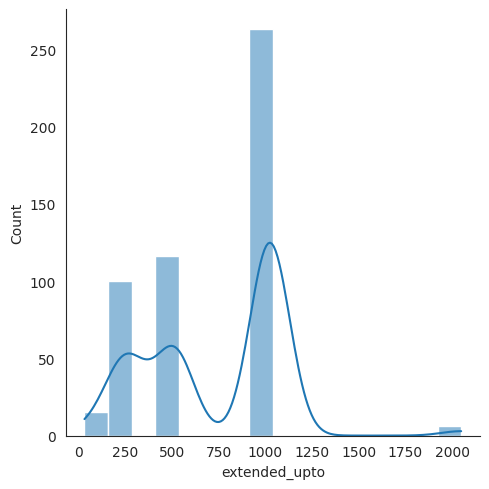

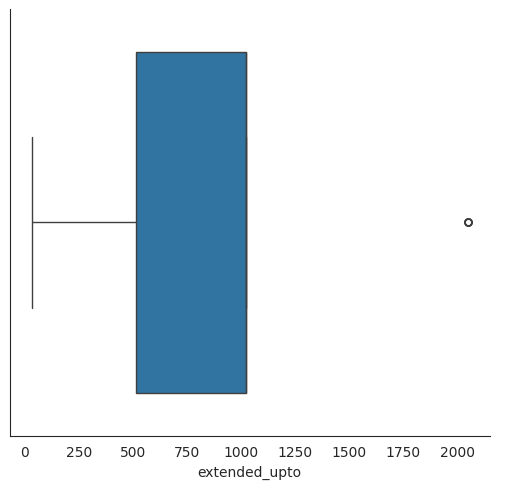

In [ ]:
for i in numeric_columns:
  plot_graph(i)

In [ ]:
df[(df['battery_capacity']>=20000) | (df['battery_capacity']<2500)]

,brand_names,model,price,rating,has_5g,has_nfc,has_Ir_blaster,processor_brand,no_of_core,frequency,battery_capacity,fast_charging_available,fast_charging_capacity,ram_capacity,internal_memory,screen_size,resolution,refresh_rate,num_rear_camera,num_front_camera,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,battery_zscore
173,apple,Apple iPhone 9,29990,61.0,False,True,False,a13,6.0,2.65,2050.0,1,NaN,3.0,64.0,4.70,750 x 1334,60,1,1.0,ios,12.0,7.0,0,NaN,NaN
190,duoqin,Duoqin F22 Pro,9990,NaN,False,False,False,helio,8.0,2.00,2150.0,0,NaN,4.0,64.0,3.54,640 x 960,60,1,1.0,android,8.0,2.0,1,NaN,NaN
275,apple,Apple iPhone 13 Mini,64900,79.0,True,True,False,bionic,6.0,3.22,2438.0,1,NaN,4.0,128.0,5.40,1080 x 2340,60,2,1.0,ios,12.0,12.0,0,NaN,NaN
391,oukitel,Oukitel WP19,29990,84.0,False,True,False,helio,8.0,2.00,21000.0,1,33.0,8.0,256.0,6.78,1080 x 2400,60,3,1.0,android,64.0,16.0,1,NaN,NaN
427,vertu,Vertu Signature Touch,650000,62.0,False,True,False,snapdragon,8.0,1.50,2275.0,0,NaN,2.0,64.0,4.70,1080 x 1920,60,1,1.0,android,13.0,2.1,0,NaN,NaN
472,vivo,Vivo Y25,7499,NaN,False,False,False,helio,4.0,1.30,1900.0,0,NaN,1.0,16.0,4.50,480 x 854,60,1,1.0,android,5.0,2.0,1,128.0,NaN
595,apple,Apple iPhone 7s,52990,NaN,False,False,False,fusion,4.0,2.37,2230.0,0,NaN,3.0,32.0,4.70,750 x 1334,60,1,1.0,ios,13.0,7.0,0,NaN,NaN
638,apple,Apple iPhone SE 2020,39900,63.0,False,True,False,a13,6.0,2.65,1821.0,1,18.0,3.0,64.0,4.70,750 x 1334,60,1,1.0,ios,12.0,7.0,0,NaN,NaN
817,cat,CAT S22 Flip,14999,NaN,False,False,False,qualcomm,4.0,1.30,2000.0,0,NaN,2.0,16.0,4.00,480 x 640,60,1,1.0,NaN,5.0,2.0,0,NaN,NaN
843,doogee,Doogee V Max,45999,88.0,True,False,False,dimensity,8.0,2.60,22000.0,1,33.0,12.0,256.0,6.58,1080 x 2408,120,3,1.0,android,108.0,32.0,1,2048.0,NaN


- Doogee V Max, Oukitel WP19 it is a outlier
- CAT S22 Flip looks like feature phone but is a smartphone
- Duoqin F22 Pro it is a feature phone

In [ ]:
df.drop([190], inplace = True)

In [ ]:
df[(df['battery_capacity']>=20000) | (df['battery_capacity']<3000)]

,brand_names,model,price,rating,has_5g,has_nfc,has_Ir_blaster,processor_brand,no_of_core,frequency,battery_capacity,fast_charging_available,fast_charging_capacity,ram_capacity,internal_memory,screen_size,resolution,refresh_rate,num_rear_camera,num_front_camera,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,battery_zscore
143,jio,Jio Phone 3,4499,NaN,False,False,False,NaN,4.0,1.40,2800.0,0,NaN,2.0,64.0,5.00,720 x 1280,60,1,1.0,android,5.0,2.0,1,128.0,NaN
173,apple,Apple iPhone 9,29990,61.0,False,True,False,a13,6.0,2.65,2050.0,1,NaN,3.0,64.0,4.70,750 x 1334,60,1,1.0,ios,12.0,7.0,0,NaN,NaN
275,apple,Apple iPhone 13 Mini,64900,79.0,True,True,False,bionic,6.0,3.22,2438.0,1,NaN,4.0,128.0,5.40,1080 x 2340,60,2,1.0,ios,12.0,12.0,0,NaN,NaN
372,google,Google Pixel 4,20120,78.0,False,True,False,snapdragon,8.0,2.80,2800.0,1,NaN,6.0,64.0,5.70,1080 x 2280,60,2,2.0,android,16.0,8.0,0,NaN,NaN
391,oukitel,Oukitel WP19,29990,84.0,False,True,False,helio,8.0,2.00,21000.0,1,33.0,8.0,256.0,6.78,1080 x 2400,60,3,1.0,android,64.0,16.0,1,NaN,NaN
427,vertu,Vertu Signature Touch,650000,62.0,False,True,False,snapdragon,8.0,1.50,2275.0,0,NaN,2.0,64.0,4.70,1080 x 1920,60,1,1.0,android,13.0,2.1,0,NaN,NaN
472,vivo,Vivo Y25,7499,NaN,False,False,False,helio,4.0,1.30,1900.0,0,NaN,1.0,16.0,4.50,480 x 854,60,1,1.0,android,5.0,2.0,1,128.0,NaN
595,apple,Apple iPhone 7s,52990,NaN,False,False,False,fusion,4.0,2.37,2230.0,0,NaN,3.0,32.0,4.70,750 x 1334,60,1,1.0,ios,13.0,7.0,0,NaN,NaN
638,apple,Apple iPhone SE 2020,39900,63.0,False,True,False,a13,6.0,2.65,1821.0,1,18.0,3.0,64.0,4.70,750 x 1334,60,1,1.0,ios,12.0,7.0,0,NaN,NaN
817,cat,CAT S22 Flip,14999,NaN,False,False,False,qualcomm,4.0,1.30,2000.0,0,NaN,2.0,16.0,4.00,480 x 640,60,1,1.0,NaN,5.0,2.0,0,NaN,NaN


- Jio Phone 3 is a feature phone

In [ ]:
df.drop([143] , inplace = True)

In [ ]:
df[(df['battery_capacity']>=20000) | (df['battery_capacity']<3500)]

,brand_names,model,price,rating,has_5g,has_nfc,has_Ir_blaster,processor_brand,no_of_core,frequency,battery_capacity,fast_charging_available,fast_charging_capacity,ram_capacity,internal_memory,screen_size,resolution,refresh_rate,num_rear_camera,num_front_camera,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,battery_zscore
6,apple,Apple iPhone 14,65999,81.0,True,True,False,bionic,6.0,3.22,3279.0,1,NaN,6.0,128.0,6.10,1170 x 2532,60,2,1.0,ios,12.0,12.0,0,NaN,NaN
15,apple,Apple iPhone 13,62999,79.0,True,True,False,bionic,6.0,3.22,3240.0,1,NaN,4.0,128.0,6.10,1170 x 2532,60,2,1.0,ios,12.0,12.0,0,NaN,NaN
33,apple,Apple iPhone 11,38999,73.0,False,True,False,a13,6.0,2.65,3110.0,0,NaN,4.0,64.0,6.10,828 x 1792,60,2,1.0,ios,12.0,12.0,0,NaN,NaN
76,apple,Apple iPhone 13 Pro,119900,83.0,True,True,False,bionic,6.0,3.22,3095.0,1,NaN,6.0,128.0,6.10,1170 x 2532,120,3,1.0,ios,12.0,12.0,0,NaN,NaN
100,apple,Apple iPhone 14 Pro,119990,75.0,True,True,False,bionic,6.0,NaN,3200.0,1,NaN,6.0,128.0,6.10,1179 x 2556,120,3,1.0,ios,48.0,12.0,0,NaN,NaN
136,apple,Apple iPhone 11 (128GB),46999,75.0,False,True,False,a13,6.0,2.65,3110.0,0,NaN,4.0,128.0,6.10,828 x 1792,60,2,1.0,ios,12.0,12.0,0,NaN,NaN
173,apple,Apple iPhone 9,29990,61.0,False,True,False,a13,6.0,2.65,2050.0,1,NaN,3.0,64.0,4.70,750 x 1334,60,1,1.0,ios,12.0,7.0,0,NaN,NaN
246,apple,Apple iPhone 14 (256GB),75999,82.0,True,True,False,bionic,6.0,3.22,3279.0,1,NaN,6.0,256.0,6.10,1170 x 2532,60,2,1.0,ios,12.0,12.0,0,NaN,NaN
262,apple,Apple iPhone XR2,71999,60.0,False,True,False,apple,NaN,NaN,3060.0,1,NaN,4.0,64.0,6.10,828 x 1792,60,2,1.0,ios,12.0,7.0,0,NaN,NaN
275,apple,Apple iPhone 13 Mini,64900,79.0,True,True,False,bionic,6.0,3.22,2438.0,1,NaN,4.0,128.0,5.40,1080 x 2340,60,2,1.0,ios,12.0,12.0,0,NaN,NaN


- Nokia C01 Plus is a smartphone not a feature phone

In [ ]:
df[df['fast_charging_capacity']>=200]

,brand_names,model,price,rating,has_5g,has_nfc,has_Ir_blaster,processor_brand,no_of_core,frequency,battery_capacity,fast_charging_available,fast_charging_capacity,ram_capacity,internal_memory,screen_size,resolution,refresh_rate,num_rear_camera,num_front_camera,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,battery_zscore
38,xiaomi,Xiaomi Redmi Note 12 Pro Max 5G,32999,83.0,True,False,True,snapdragon,8.0,2.36,5200.0,1,210.0,6.0,128.0,6.67,1080 x 2460,120,4,1.0,android,108.0,32.0,1,512.0,NaN
230,iqoo,iQOO 11 Pro 5G,58990,89.0,True,True,True,snapdragon,8.0,3.20,4700.0,1,200.0,8.0,256.0,6.78,1440 x 3200,144,3,1.0,android,50.0,16.0,0,NaN,NaN
397,realme,Realme GT Neo 5,34999,83.0,True,True,False,snapdragon,8.0,3.20,4600.0,1,240.0,8.0,128.0,6.70,1080 x 2412,120,3,1.0,android,50.0,16.0,0,NaN,NaN
511,xiaomi,Xiaomi Redmi Note 12 Discovery Edition,26990,86.0,True,True,True,dimensity,8.0,2.60,4300.0,1,210.0,8.0,256.0,6.67,1080 x 2400,120,3,1.0,android,200.0,16.0,0,NaN,NaN


- these phones have 200+ fast charging capacity which is very rare

In [ ]:
df[(df['screen_size']<=6) | (df['screen_size']>=7.5)][['model' , 'screen_size']]

,model,screen_size
98,Vivo X Fold 5G,8.03
149,Apple iPhone 12 Mini,5.40
173,Apple iPhone 9,4.70
235,Xiaomi Mix Fold 2 5G,8.02
275,Apple iPhone 13 Mini,5.40
280,Apple iPhone 14 Mini,5.42
314,Vivo Y100,6.00
319,Samsung Galaxy Z Fold 4,7.60
320,Royole FlexPai 2,7.80
350,Jio JioPhone Next,5.45


- smartphones which have screen size < 5 are mostly apple smartphones

In [ ]:
df[df['primary_camera_rear']>=200][['model' , 'primary_camera_rear']]

,model,primary_camera_rear
7,Xiaomi Redmi Note 12 Pro Plus,200.0
14,Samsung Galaxy S23 Ultra 5G,200.0
67,Xiaomi Redmi Note 12 Pro Plus (12GB RAM + 256GB),200.0
180,Infinix Zero Ultra,200.0
192,Nokia N73 5G,200.0
201,Motorola Edge 30 Ultra,200.0
239,Xiaomi Redmi Note 12 Explorer,200.0
294,Motorola Edge 30 Ultra (12GB RAM + 256GB),200.0
359,Xiaomi 12T Pro 5G,200.0
362,Samsung Galaxy S24 Ultra,200.0


- these are not outliers
- Nokia X60 Pro 5G , Nokia X60 5G	, Nokia N73 5G	have 200 MP rear camera

In [ ]:
df[df['primary_camera_front']>=60][['model' , 'primary_camera_front']]

,model,primary_camera_front
120,Motorola Edge 30 Pro 5G,60.0
182,Motorola Moto X40,60.0
201,Motorola Edge 30 Ultra,60.0
251,Infinix Zero 20,60.0
294,Motorola Edge 30 Ultra (12GB RAM + 256GB),60.0
362,Samsung Galaxy S24 Ultra,60.0
418,Motorola Moto X30 Pro,60.0
571,Motorola Edge 40 Pro 5G,60.0
851,Huawei Nova 10,60.0
907,Motorola Moto Edge X30 Pro,60.0


- these smartphones have 60MP front camera

In [ ]:
df.isnull().sum()
df.drop(columns = ['battery_zscore'],inplace = True)

In [ ]:
df.isnull().sum()

,0
brand_names,0
model,0
price,0
rating,99
has_5g,0
has_nfc,0
has_Ir_blaster,0
processor_brand,19
no_of_core,6
frequency,42


## BIVARIATE ANALYSIS

In [ ]:
df.head()

,brand_names,model,price,rating,has_5g,has_nfc,has_Ir_blaster,processor_brand,no_of_core,frequency,battery_capacity,fast_charging_available,fast_charging_capacity,ram_capacity,internal_memory,screen_size,resolution,refresh_rate,num_rear_camera,num_front_camera,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,100.0,12.0,256.0,6.70,1440 x 3216,120,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6.0,128.0,6.59,1080 x 2412,120,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,1,15.0,4.0,64.0,6.60,1080 x 2408,90,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,NaN,6.0,128.0,6.55,1080 x 2400,120,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,1,67.0,6.0,128.0,6.70,1080 x 2412,120,3,1.0,android,108.0,16.0,0,NaN


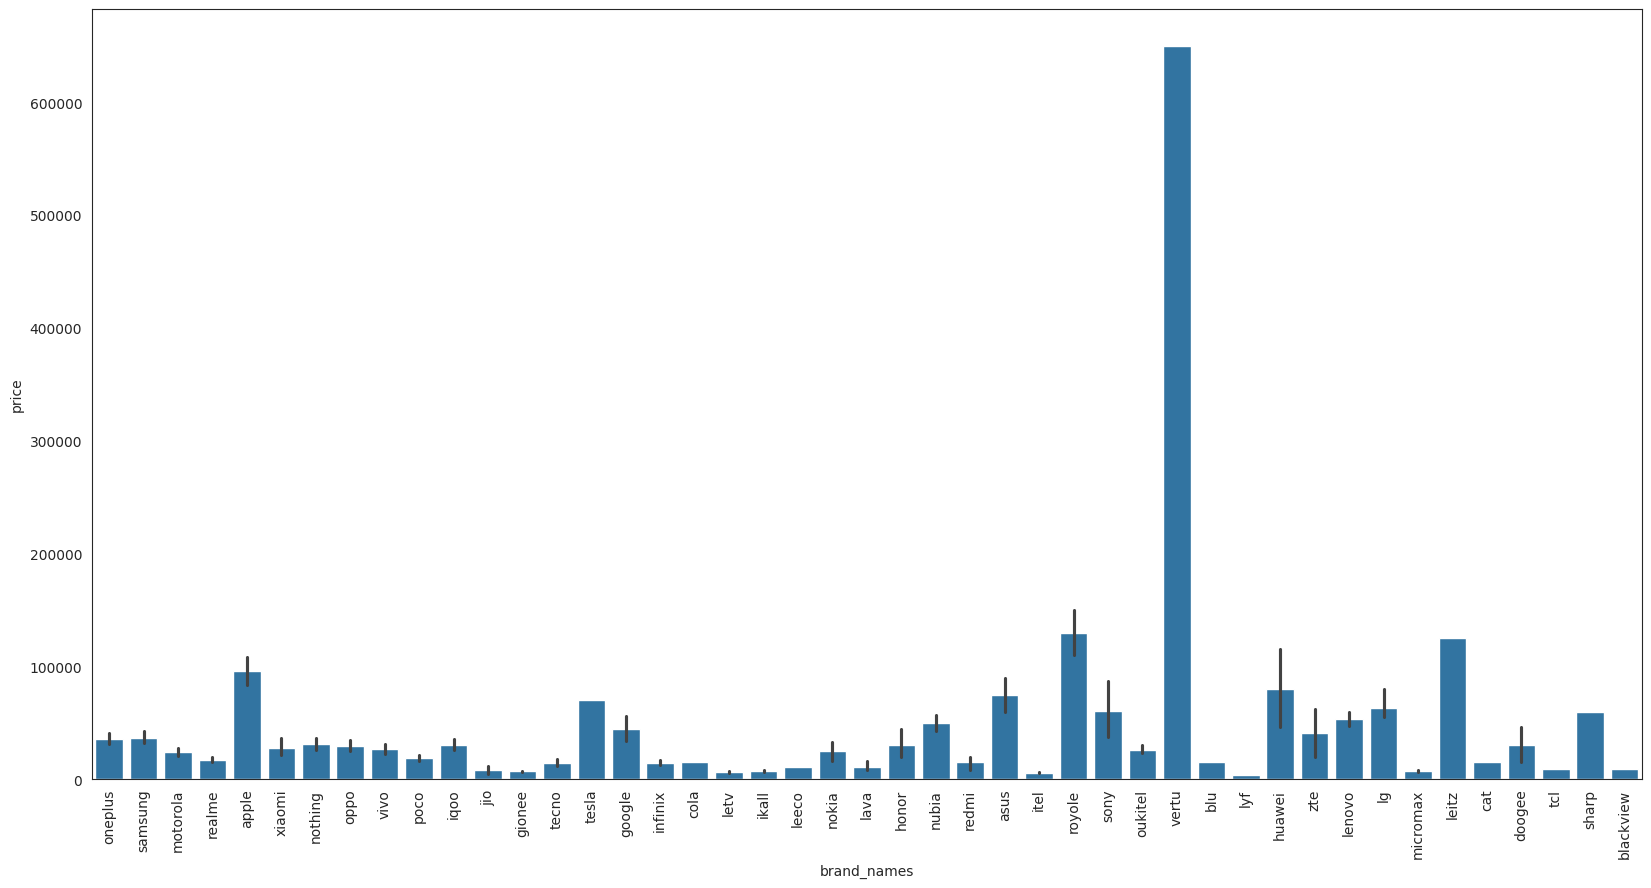

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=df,x='brand_names',y='price')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
x = df.groupby('brand_names').count()['model']

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'oneplus'),
  Text(1, 0, 'samsung'),
  Text(2, 0, 'motorola'),
  Text(3, 0, 'realme'),
  Text(4, 0, 'apple'),
  Text(5, 0, 'xiaomi'),
  Text(6, 0, 'oppo'),
  Text(7, 0, 'vivo'),
  Text(8, 0, 'poco'),
  Text(9, 0, 'iqoo'),
  Text(10, 0, 'tecno'),
  Text(11, 0, 'google'),
  Text(12, 0, 'infinix'),
  Text(13, 0, 'nokia'),
  Text(14, 0, 'honor'),
  Text(15, 0, 'huawei')])

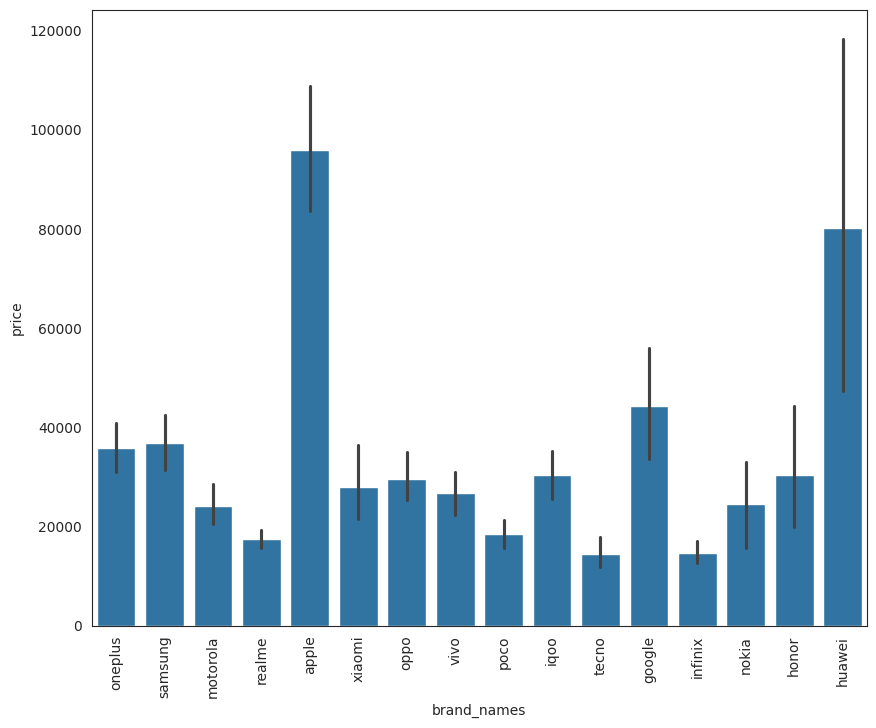

In [ ]:
temp_df = df[df['brand_names'].isin(x[x > 10].index)]
plt.figure(figsize=(10,8))
sns.barplot(data=temp_df,x='brand_names',y='price')
plt.xticks(rotation='vertical')

- as usual apple phone has high price in most common brand names

<Axes: xlabel='rating', ylabel='price'>

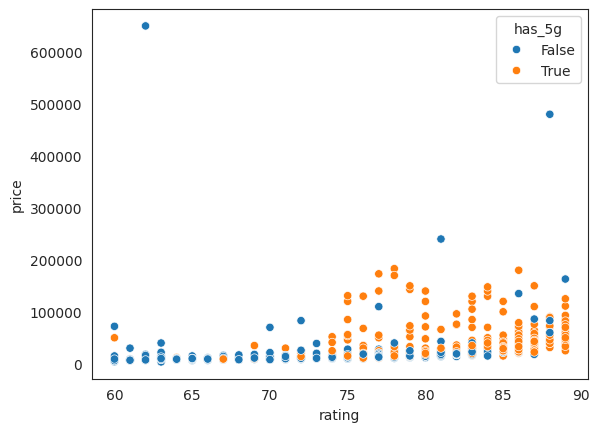

In [ ]:
sns.scatterplot(data=df,y='price',x='rating' , hue = 'has_5g')

- not a strong corelation because some phones which have higher rating also have less price

<Axes: xlabel='has_5g', ylabel='price'>

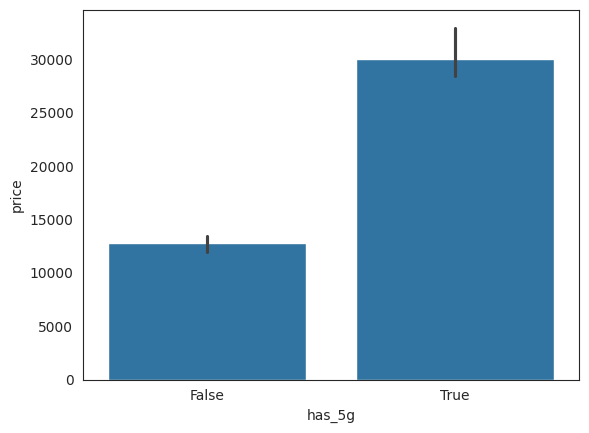

In [ ]:
sns.barplot(data = df , x = 'has_5g' , y = 'price' , estimator=np.median)

<Axes: xlabel='has_5g', ylabel='price'>

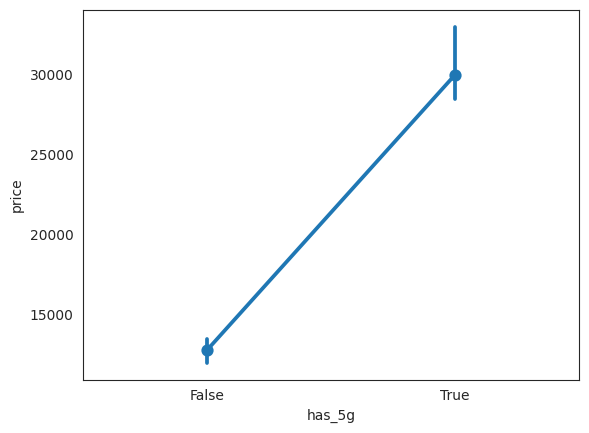

In [ ]:
sns.pointplot(data = df , x = 'has_5g' , y = 'price' , estimator=np.median)

<Axes: xlabel='has_nfc', ylabel='price'>

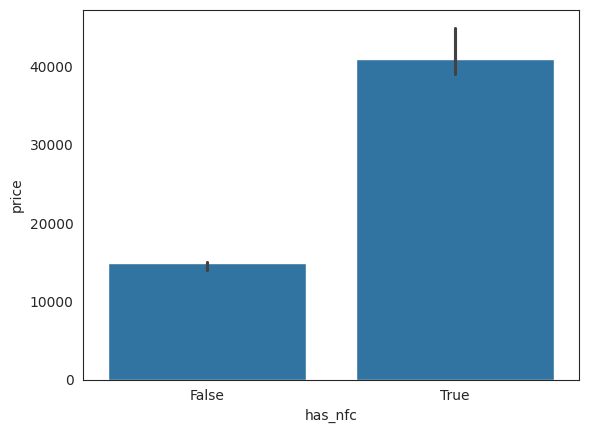

In [ ]:
sns.barplot(data = df , x = 'has_nfc' , y = 'price' , estimator=np.median)

<Axes: xlabel='has_Ir_blaster', ylabel='price'>

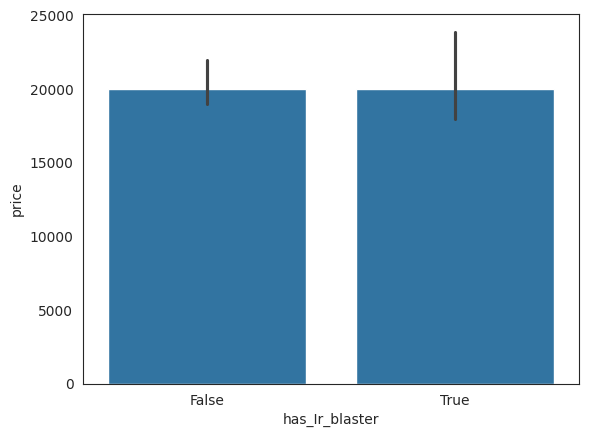

In [ ]:
sns.barplot(data = df , x = 'has_Ir_blaster' , y = 'price' , estimator=np.median)

- not so much dependent on price column

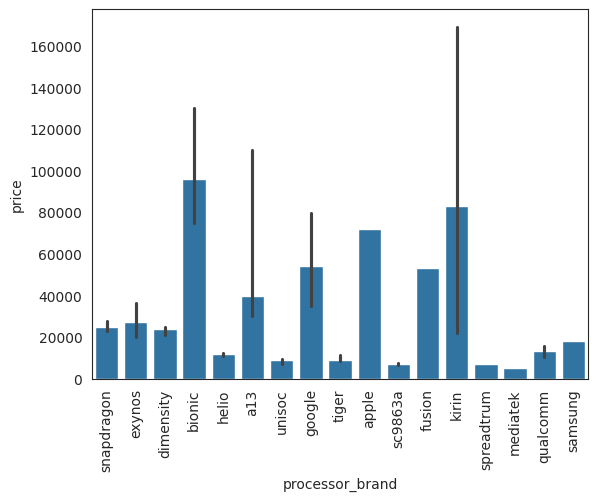

In [ ]:
sns.barplot(data=temp_df,x='processor_brand',y='price',estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

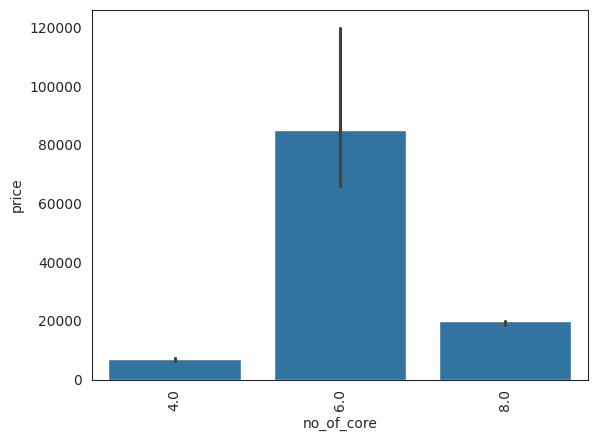

In [ ]:
sns.barplot(data=temp_df,x='no_of_core',y='price',estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df[df['no_of_core'] == 6]['brand_names'].value_counts()

,count
brand_names,
apple,39


- apple phones have hexa core and apple phones are costly in price so 6 core phones have higher median price
- 8 core have higher because there is a phone of 650000 price

In [ ]:
pd.crosstab(df['no_of_core'] , df['os'])

os,android,ios,other
no_of_core,,,
4.0,32,1,1
6.0,0,39,0
8.0,874,1,10


<Axes: xlabel='frequency', ylabel='price'>

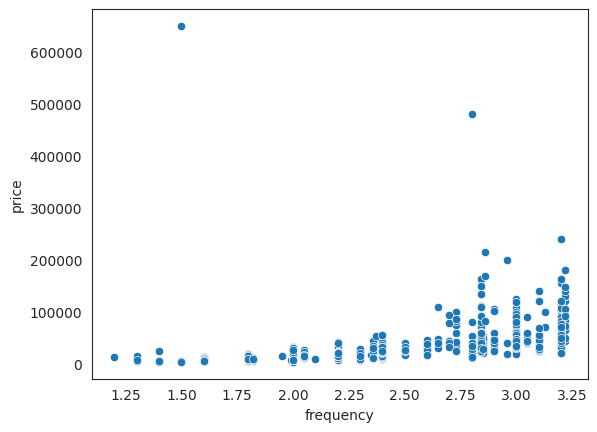

In [ ]:
sns.scatterplot(data=df,x='frequency',y='price')

<Axes: xlabel='screen_size', ylabel='price'>

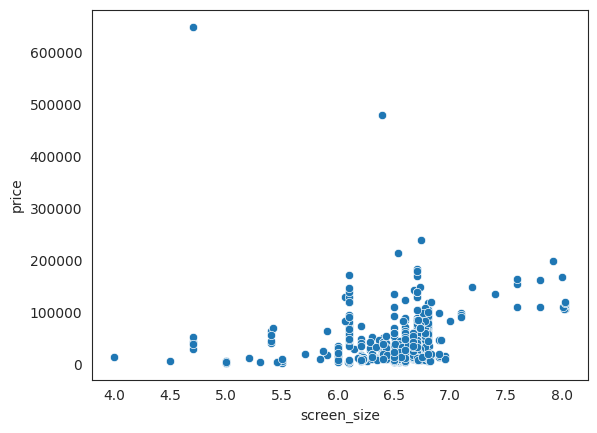

In [ ]:
sns.scatterplot(data=df,x='screen_size',y='price')

In [ ]:
numeric_analysis_col = ['battery_capacity', 'fast_charging_capacity','primary_camera_rear',	'primary_camera_front']

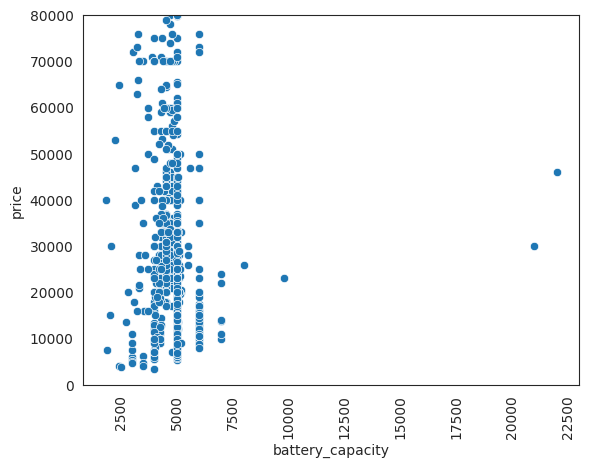

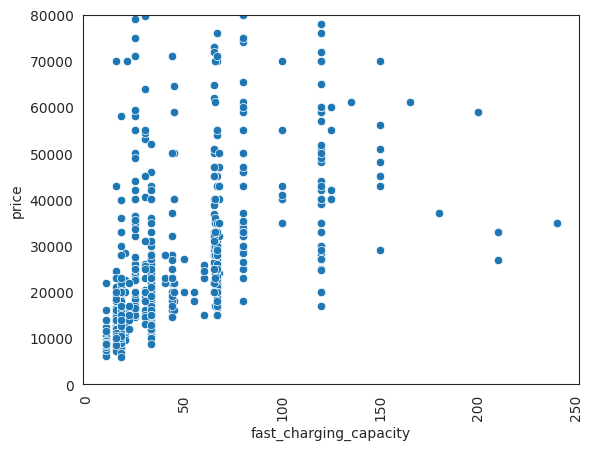

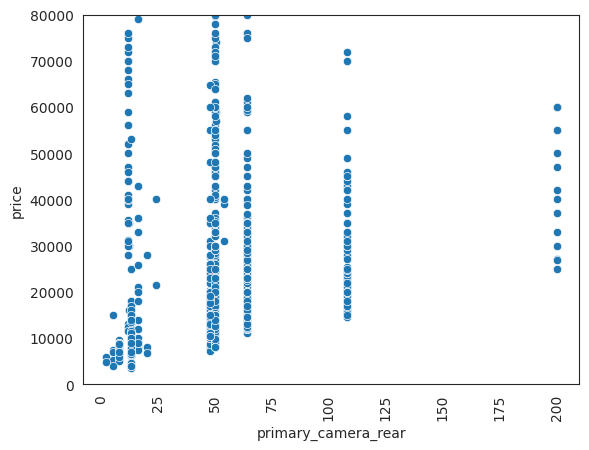

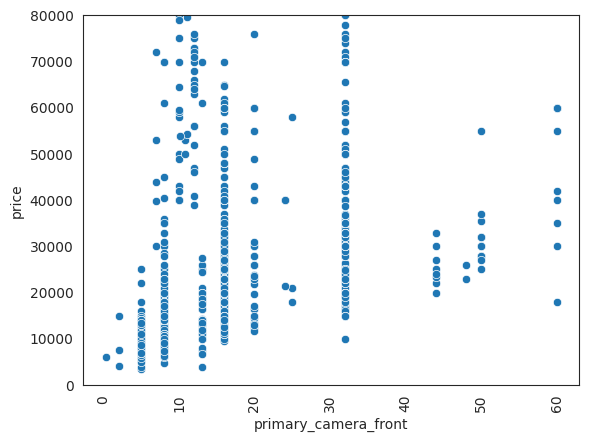

In [ ]:
for i in numeric_analysis_col:
  sns.scatterplot(data=df,x=i,y='price')
  plt.xticks(rotation='vertical')
  plt.ylim(0,80000)
  plt.show()

- not so much dependent on price column
- price of smartphones which have battery capacity in range of 2000 to 6000 mah is vary due to many type of brand
- there is some relationship of fast charging capacity and primary camera front with price in range of 0 to 80000

In [ ]:
df.head()

,brand_names,model,price,rating,has_5g,has_nfc,has_Ir_blaster,processor_brand,no_of_core,frequency,battery_capacity,fast_charging_available,fast_charging_capacity,ram_capacity,internal_memory,screen_size,resolution,refresh_rate,num_rear_camera,num_front_camera,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,100.0,12.0,256.0,6.70,1440 x 3216,120,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6.0,128.0,6.59,1080 x 2412,120,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,1,15.0,4.0,64.0,6.60,1080 x 2408,90,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,NaN,6.0,128.0,6.55,1080 x 2400,120,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,1,67.0,6.0,128.0,6.70,1080 x 2412,120,3,1.0,android,108.0,16.0,0,NaN


In [ ]:
categorical_analysis_columns = ['fast_charging_available' , 'ram_capacity' , 'internal_memory' , 'refresh_rate' , 'num_rear_camera'	,'num_front_camera' ,'os' , 'extended_memory_available']

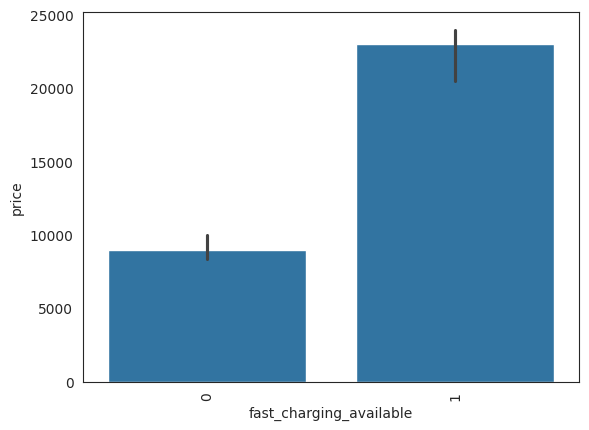

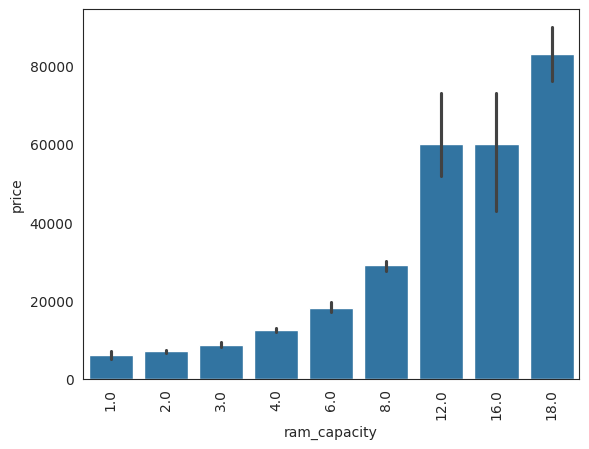

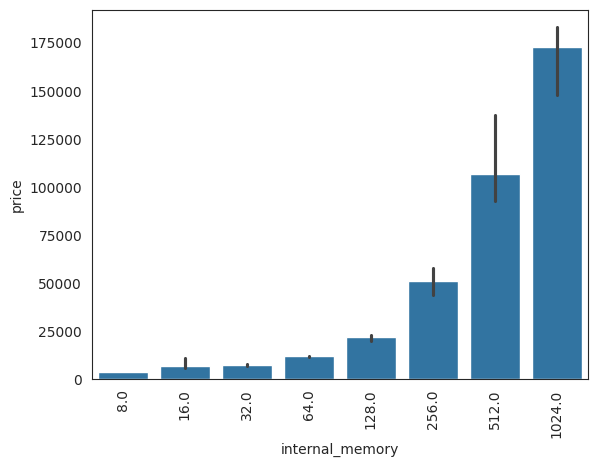

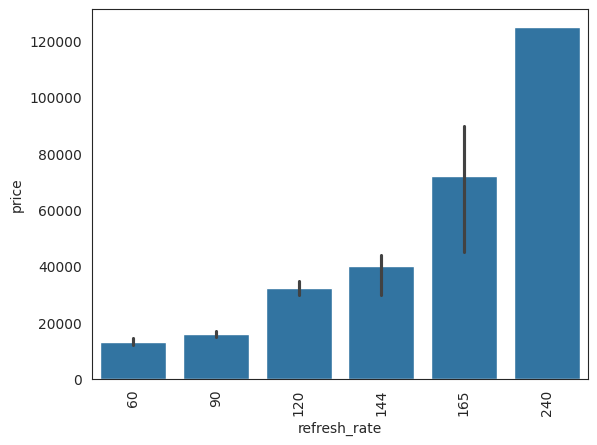

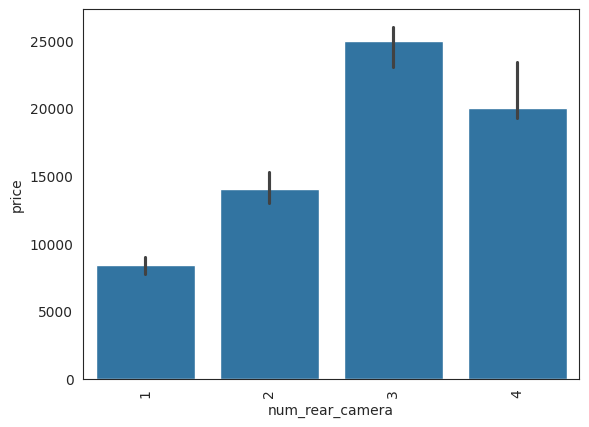

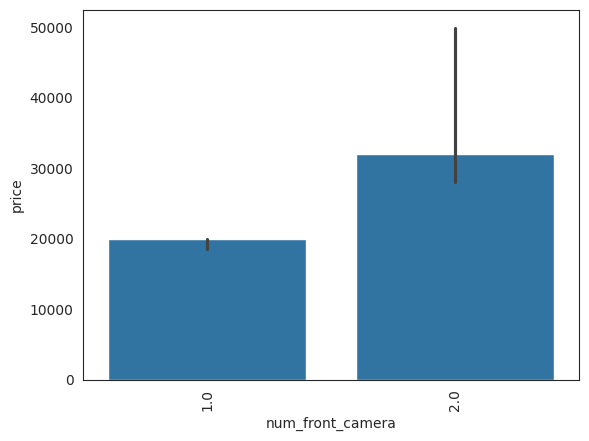

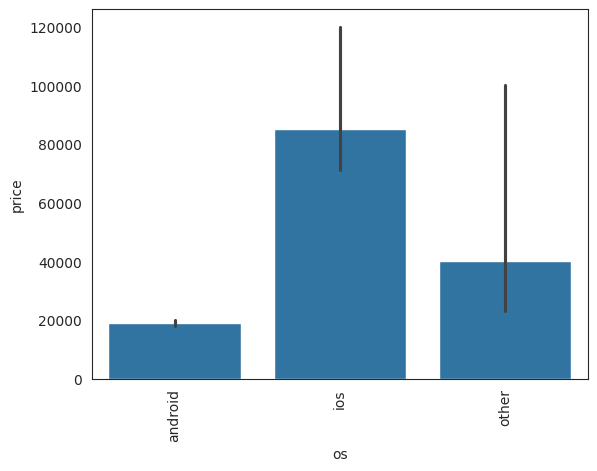

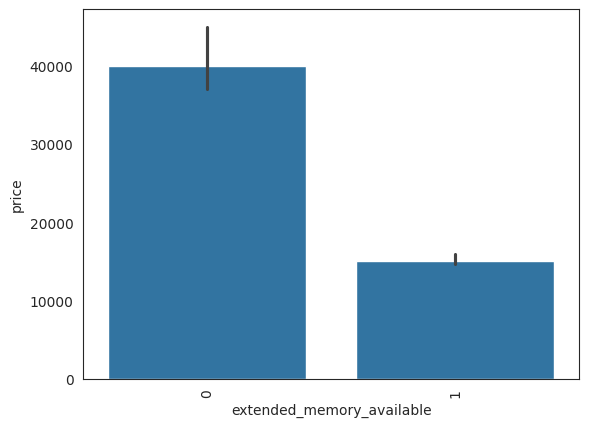

In [ ]:
for i in categorical_analysis_columns:
  sns.barplot(data=df,x=i,y='price',estimator=np.median)
  plt.xticks(rotation='vertical')
  plt.show()

- price is exponentially ram capacity , internal memory , refresh rate
- ios has high price

<Axes: >

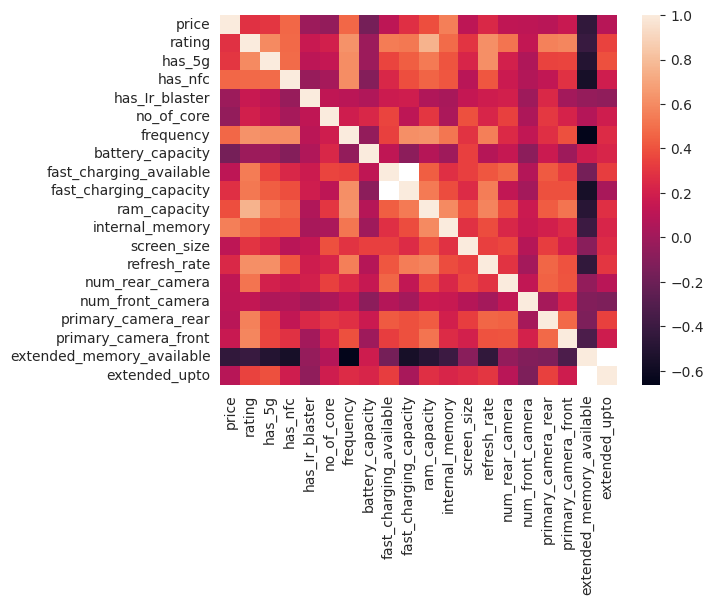

In [ ]:
sns.heatmap(df.corr(numeric_only=True))

In [ ]:
df.corr(numeric_only=True)['price']

,price
price,1.000000
rating,0.283504
has_5g,0.304114
has_nfc,0.470401
has_Ir_blaster,-0.016393
no_of_core,-0.052244
frequency,0.473517
battery_capacity,-0.163215
fast_charging_available,0.114309
fast_charging_capacity,0.277591


In [ ]:
df.isnull().sum()

,0
brand_names,0
model,0
price,0
rating,99
has_5g,0
has_nfc,0
has_Ir_blaster,0
processor_brand,19
no_of_core,6
frequency,42


In [ ]:
df.corr(numeric_only=True)['rating']

,rating
price,0.283504
rating,1.000000
has_5g,0.596087
has_nfc,0.474754
has_Ir_blaster,0.156421
no_of_core,0.199741
frequency,0.628446
battery_capacity,-0.015581
fast_charging_available,0.542814
fast_charging_capacity,0.527613


- rating is mostly depend on all numeri columns so during filling the missing values we should take help from all numeric columns

In [373]:
## knn imputer
df.shape

(978, 25)

In [375]:
from sklearn.impute import KNNImputer

In [383]:
x_df = df.select_dtypes(include=['int64','float64'])
x_df_values = KNNImputer(n_neighbors=5).fit_transform(x_df)
x_df = pd.DataFrame(x_df_values, columns=x_df.columns)
x_df.corr()['price'].reset_index()

,index,price
0,price,1.000000
1,rating,0.338895
2,no_of_core,-0.060173
3,frequency,0.494004
4,battery_capacity,-0.165920
5,fast_charging_available,0.114309
6,fast_charging_capacity,0.263321
7,ram_capacity,0.385131
8,internal_memory,0.556757
9,screen_size,0.110488


In [390]:
a = df.corr(numeric_only=True)['price']

In [391]:
a

,price
price,1.000000
rating,0.283504
has_5g,0.304114
has_nfc,0.470401
has_Ir_blaster,-0.016393
no_of_core,-0.052244
frequency,0.473517
battery_capacity,-0.163215
fast_charging_available,0.114309
fast_charging_capacity,0.277591
